In [1]:
# Importing some useful libarries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

('This image is: ', <type 'numpy.ndarray'>, 'With dimensions: ', (540, 960, 3))
AxesImage(60,40;372x248)


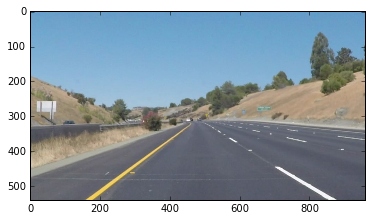

In [2]:
# Reading in an image
image = mpimg.imread('test_images/solidYellowCurve2.jpg')
# Printing out some stats and plotting
print('This image is: ', type(image) , 'With dimensions: ', image.shape)
h, w = image.shape[0], image.shape[1]
print plt.imshow(image, cmap='gray')

AxesImage(60,40;372x248)


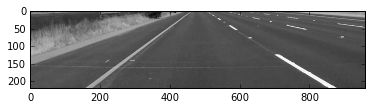

In [3]:
# Find ROI part in the image
offsetX = h/2 + 50
ROI = image[offsetX:,:]
# converting to gray scale
gray = cv2.cvtColor(ROI, cv2.COLOR_BGR2GRAY)
#gray = np.uint8(gray)
#gray = cv2.equalizeHist(gray)
#print plt.imshow(hist_equ)
print plt.imshow(gray, cmap = 'gray')

AxesImage(60,40;372x248)


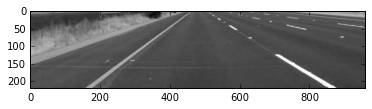

In [4]:
# remove noise
img = cv2.GaussianBlur(gray,(5,5),0)
print plt.imshow(img, cmap = 'gray')

AxesImage(60,40;372x248)


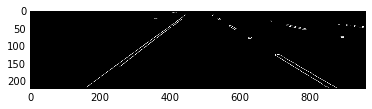

In [5]:
# Edge Detetction
edges = cv2.Canny(img,200,255) #apertureSize = 3)
print plt.imshow(edges, cmap = 'gray')

AxesImage(60,40;372x248)


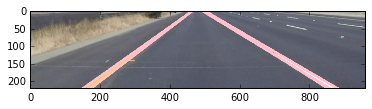

In [6]:
'''
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,3,np.pi/180,100,minLineLength,maxLineGap)
#print (lines)
if(len(lines)):
    for i in xrange(len(lines)):
        for x1,y1,x2,y2 in lines[i]:
            cv2.line(img,(x1,y1),(x2,y2),(255,0,0),7)
'''
lines = cv2.HoughLines(edges,1,np.pi/180,100)
prevTheta = 0.0
lineColor = (255,192,203)
lineThickness = 5
curX1 = curY1 = curX2 = curY2 = 0
for i in xrange(len(lines)):
    for rho,theta in lines[i]:
        if abs(theta-prevTheta)>1:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b)) 
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            m = (y2-y1)*1.0/(x2-x1)*1.0
            if m>0.5 or m<-0.5 :
                curX1, curY1, curX2, curY2 = x1, y1, x2, y2
            cv2.line(ROI, (curX1, curY1), (curX2, curY2), lineColor, lineThickness)
        prevTheta = theta

print plt.imshow(ROI, cmap='gray')

AxesImage(60,40;372x248)


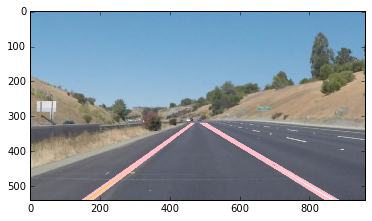

In [7]:
image[offsetX:,:] = ROI
print plt.imshow(image, cmap='gray')

AxesImage(60,40;372x248)


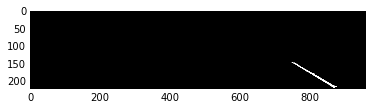

In [8]:
# Add edge detection part into original image
ret, mask = cv2.threshold(img, 240, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
print plt.imshow(mask, cmap='gray')

In [26]:
tmp = image[offsetX:, :]
final_bk = cv2.bitwise_and(tmp, tmp, mask=mask_inv)
final_fg = cv2.bitwise_or(img, img, mask=mask)
fhg = np.zeros((270, 960, 3))
fhg[:,:,0] = final_fg
fhg[:,:,1] = final_fg
fhg[:,:,2] = final_fg
print final_bk.shape
print fhg.shape
print type(final_bk)
print type(fhg)
image[offsetX:,:] = np.add(final_bk, fhg)

(270, 960, 3)
(270, 960, 3)
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


AxesImage(60,40;372x248)


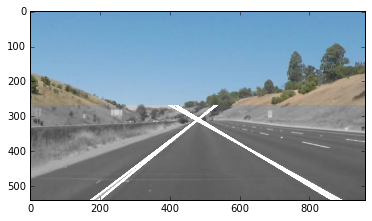

In [27]:
print plt.imshow(image)

In [ ]:
image = image.threshold()
print plt.imshow(image)

In [ ]:
# Implement Canny edge filter Parameters -> image, lowThreshold, highThreshold 
edges = cv2.Canny(img,255,255)
print plt.imshow(edges, cmap = 'gray')

AxesImage(60,40;372x248)


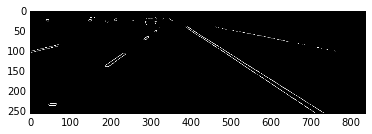

In [49]:
# Find region of interest
ROI = edges[372/2 + 100:, 248/2:]
print plt.imshow(ROI, cmap = 'gray')

#rho = 
#lines = cv2.HoughLinesP(ROI, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
#line_img = np.zeros(ROI.shape, dtype=np.uint8)
#draw_lines(line_img, lines)
#return line_img

(254, 836)
AxesImage(60,40;372x248)
1868 210476
210476 1868


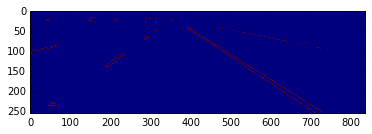

In [51]:
print ROI.shape
print plt.imshow(ROI)
whiteCount = 0
blackCount = 0
for i in xrange(ROI.shape[0]):
    for j in xrange(ROI.shape[1]):
        if ROI[i][j]==0:
            whiteCount+=1
            ROI[i][j] = 255
        else:
            blackCount+=1
            ROI[i][j] = 0
#print plt.imshow(ROI)
print whiteCount, blackCount

whiteCount = 0
blackCount = 0
for i in xrange(ROI.shape[0]):
    for j in xrange(ROI.shape[1]):
        if ROI[i][j]==0:
            whiteCount+=1
            #ROI[i][j] = 255
        else:
            blackCount+=1
            #ROI[i][j] = 0
print whiteCount, blackCount